# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Analysis: One observation is that the gender distribution is almost equal. Having a balanced distribution is good for a data set. 
It appears that there is a positive correlation between mouse weight and tumor volume in the Capomulin regimen. This suggests that as one increases the other tends to increase as well.
A third observation is of the bar graphs, they tell us that there was a different sample size for each treatment used in the experiment.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
desired_columns = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]
# merged_data = merged_data[desired_columns]
# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [54]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
num_mice

249

In [55]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

duplicate_mouse_ids


array(['g989'], dtype=object)

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data['Mouse ID'] == 'g989']

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset=['Mouse ID'])
clean_data = clean_data[clean_data['Mouse ID'] != 'g989']

clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [58]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()

num_mice_clean

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = merged_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_data = merged_data.groupby('Drug Regimen')
mean_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_volume = grouped_data['Tumor Volume (mm3)'].var()
std_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_volume = grouped_data['Tumor Volume (mm3)'].sem()
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_volume,
    'Median Tumor Volume': median_volume,
    'Tumor Volume Variance': variance_volume,
    'Tumor Volume Std. Dev.': std_volume,
    'Tumor Volume SEM': sem_volume})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = grouped_data.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

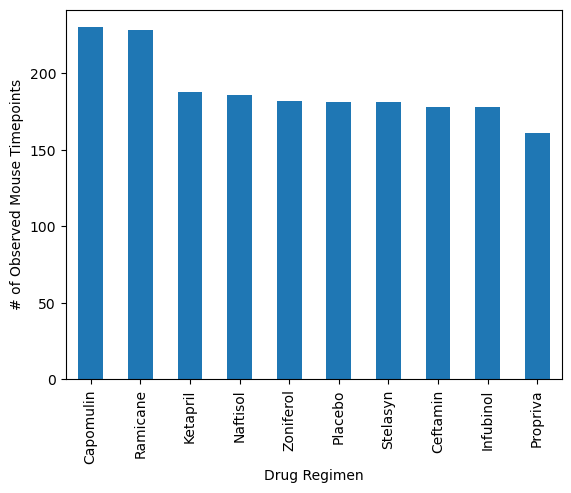

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = merged_data.groupby('Drug Regimen').size()

drug_counts = drug_counts.sort_values(ascending=False)
drug_counts.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

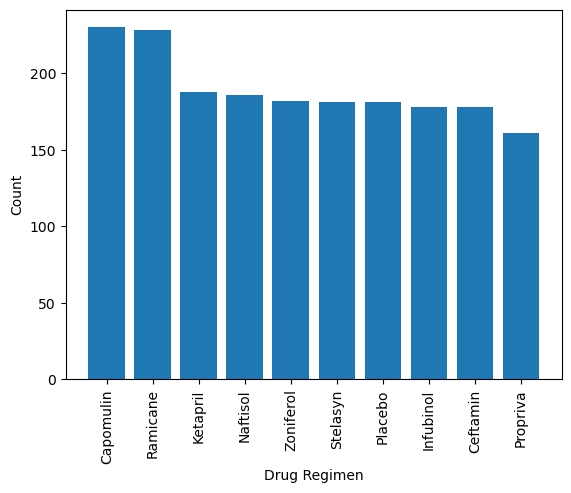

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = merged_data['Drug Regimen'].value_counts()
drugs = drug_counts.index
counts = drug_counts.values
plt.bar(drugs, counts)
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


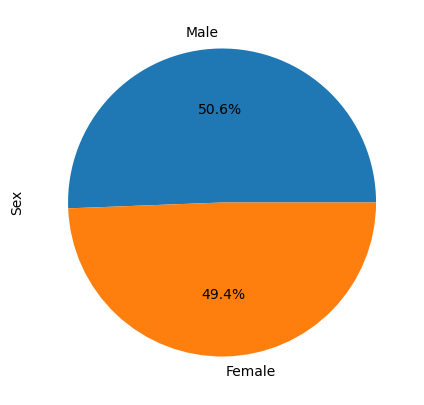

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = merged_data['Sex'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.ylabel('Sex')
plt.show()

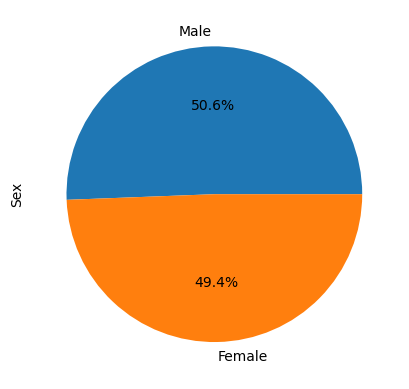

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
merged_data['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
max_timepoints2 = merged_data.groupby('Mouse ID')['Timepoint'].max()
max_timepoints2 = max_timepoints2.reset_index()
merged_df = pd.merge(merged_data, max_timepoints2, on=['Mouse ID', 'Timepoint'], how='left')

In [67]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for treatment in treatments:
    drug = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    quartiles = drug.quantile([.25, .5, .75])
    q1 = quartiles[.25]
    q3 = quartiles[.75]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    treatment_outliers = drug.loc[(drug < lower_bound) | (drug > upper_bound)]
    print(f"{treatment}'s potential outliers: {treatment_outliers}")


Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


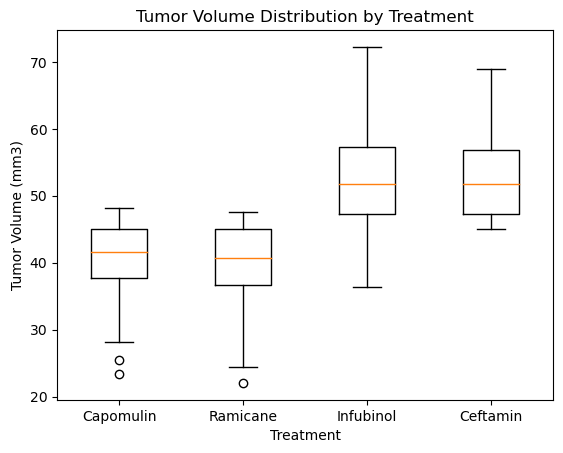

In [69]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

data = [merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] for treatment in treatments]

plt.boxplot(data, labels=treatments)

plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

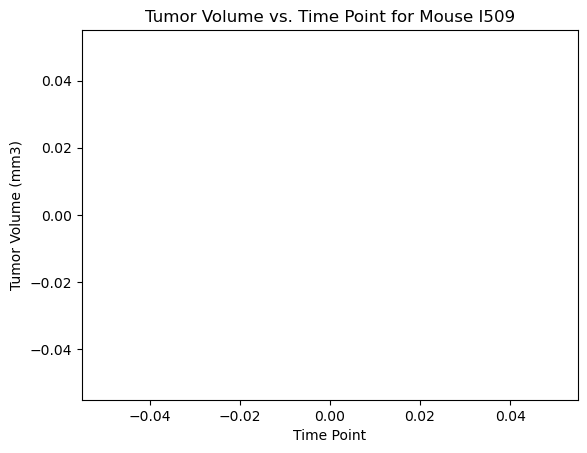

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'I509'
capomulin_data = merged_data.loc[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == mouse_id)]
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Time Point for Mouse ' + mouse_id)
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

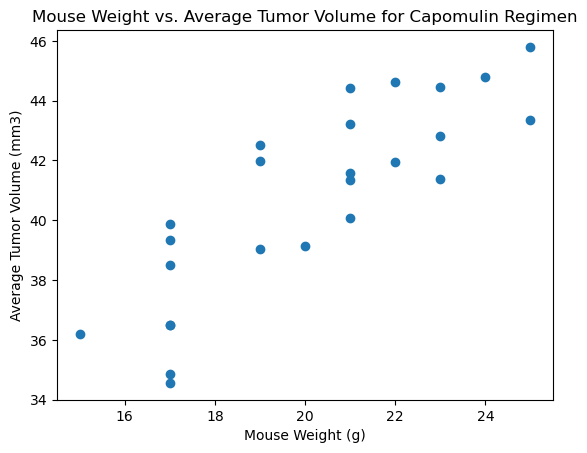

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
plt.scatter(mouse_weights, average_tumor_volume)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

Correlation coefficient: 0.8419363424694722


<function matplotlib.pyplot.show(close=None, block=None)>

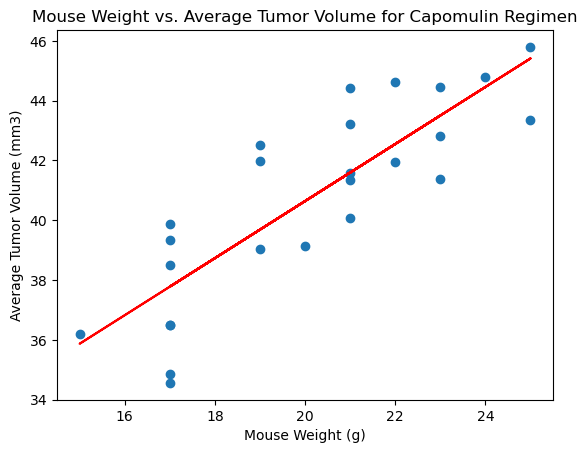

In [77]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
from scipy.stats import linregress
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
correlation = mouse_weights.corr(average_tumor_volume)
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weights, average_tumor_volume)
plt.scatter(mouse_weights, average_tumor_volume)
regress_values = mouse_weights * slope + intercept
plt.plot(mouse_weights, regress_values, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"Correlation coefficient: {correlation}")
plt.show

